In [110]:
import math
from scipy.optimize import minimize

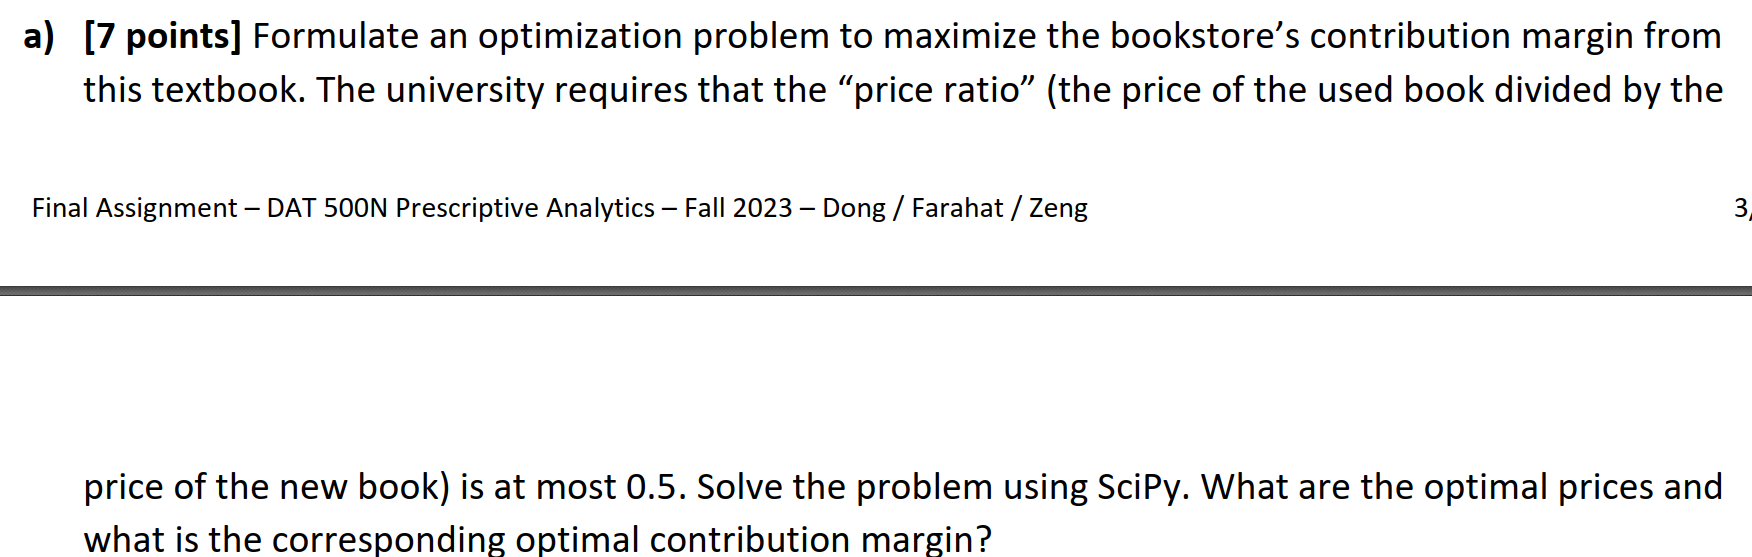

In [111]:
#setups
import numpy as np
e = 2.7183

#initial value
#[p_new,p_old]
initial_guess=[0,0]

def best_d_old(p_new, p_old):
    d_old = 250 * e**(1 - 0.01*p_old) / (1 + e**(1 - 0.01*p_old) + e**(2 - 0.01*p_new))
    return d_old

def best_d_new(p_new, p_old):
    d_new = 250 * e**(2 - 0.01*p_new) / (1 + e**(1 - 0.01*p_old) + e**(2 - 0.01*p_new))
    return d_new

def best_price_ratio(p_new, p_old):
    price_ratio = p_old/p_new
    return price_ratio

def best_avg_price(p_new, p_old):
    avg_price = (p_new*d_new + p_old*d_old) / (d_new + d_old)
    return avg_price


In [112]:
#objective
new_cost = 75
old_cost = 25
def max_profit(x):
    p_new, p_old = x
    d_old = best_d_old(p_new, p_old)
    d_new = best_d_new(p_new, p_old)
    profit = (p_new - new_cost)*d_new + (p_old - old_cost)*d_old
    return profit*(-1)



In [113]:
#constraints
def price_ratio_constraint(x):
    p_new, p_old = x
    return p_new - 2 * p_old # p_old/p_new <= 0.5 -> 2p_old <= p_new


In [114]:
bnds = ((0, None), (0, None))
cons = ({'type': 'ineq', 'fun': price_ratio_constraint})

In [115]:
#solve
sol = minimize(fun = max_profit, x0 = initial_guess, method = "SLSQP",\
               bounds = bnds, constraints = cons)

print("Objective Value (Squared error):", -sol.fun)
print("Optimal Price of New Books", sol.x[0])
print("Optimal Price of Old Books", sol.x[1])

Objective Value (Squared error): 20080.693032328887
Optimal Price of New Books 300.78255590321834
Optimal Price of Old Books 150.3912779516093


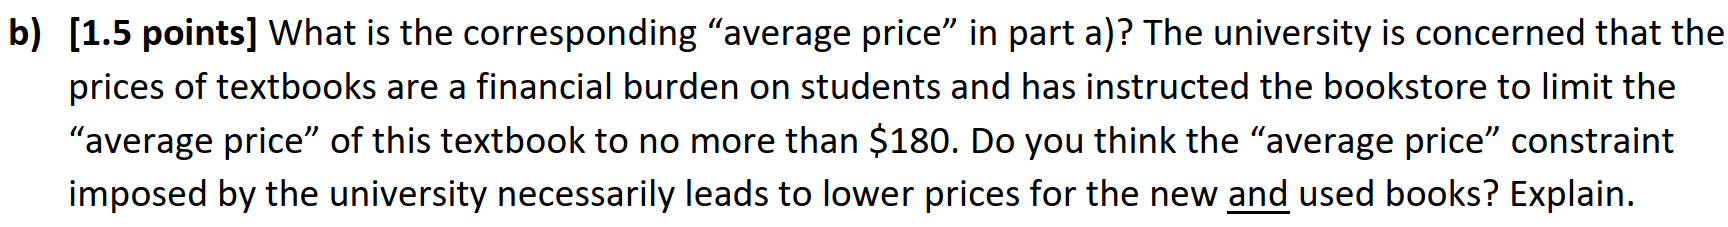

In [116]:
optimal_p_new, optimal_p_old = sol.x
demand_new_optimal = best_d_new(optimal_p_new, optimal_p_old)
demand_old_optimal = best_d_old(optimal_p_new, optimal_p_old)


total_revenue = (optimal_p_new * demand_new_optimal) + (optimal_p_old * demand_old_optimal)
average_price_optimal = total_revenue / (demand_new_optimal + demand_old_optimal)
average_price_optimal

207.03176163225982

In [117]:
import numpy as np
e = 2.7183

#initial value
#[p_new,p_old]
initial_guess=[0,0]

def best_d_old(p_new, p_old):
    d_old = 250 * e**(1 - 0.01*p_old) / (1 + e**(1 - 0.01*p_old) + e**(2 - 0.01*p_new))
    return d_old

def best_d_new(p_new, p_old):
    d_new = 250 * e**(2 - 0.01*p_new) / (1 + e**(1 - 0.01*p_old) + e**(2 - 0.01*p_new))
    return d_new

#objective
new_cost = 75
old_cost = 25
def max_profit(x):
    p_new, p_old = x
    d_old = best_d_old(p_new, p_old)
    d_new = best_d_new(p_new, p_old)
    profit = (p_new - new_cost)*d_new + (p_old - old_cost)*d_old
    return profit*(-1)

#constraints
def price_ratio_constraint(x):
    p_new, p_old = x
    return p_new - 2 * p_old # p_old/p_new <= 0.5 -> 2p_old <= p_new

def avg_price_constraint(x):
    p_new, p_old = x
    d_old = best_d_old(p_new, p_old)
    d_new = best_d_new(p_new, p_old)
    avg_price = (p_new*d_new + p_old*d_old) / (d_new + d_old)
    return 180 - avg_price

bnds = ((0, None), (0, None))
cons = [{'type': 'ineq', 'fun': price_ratio_constraint}, 
        {'type': 'ineq', 'fun': avg_price_constraint}]

#solve
sol = minimize(fun = max_profit, x0 = initial_guess, method = "SLSQP",\
               bounds = bnds, constraints = cons)

print("Objective Value (Squared error):", -sol.fun)
print("Optimal Price of New Books", sol.x[0])
print("Optimal Price of Old Books", sol.x[1])

Objective Value (Squared error): 19302.653876748816
Optimal Price of New Books 250.48178535947224
Optimal Price of Old Books 125.24089267979446
